In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler




In [ ]:
df = pd.read_csv("/content/drive/MyDrive/_All_Cities_Cleaned.csv")
df.head()


,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [ ]:
df.describe()

,bedroom,price,area,bathroom
count,193011.000000,1.930110e+05,193011.000000,193011.000000
mean,2.081679,4.433654e+04,1264.604468,2.059883
std,0.956901,9.195199e+04,1043.725561,0.934805
min,1.000000,1.200000e+03,3.000000,1.000000
25%,1.000000,1.300000e+04,650.000000,1.000000
50%,2.000000,2.100000e+04,1000.000000,2.000000
75%,3.000000,3.600000e+04,1440.000000,3.000000
max,15.000000,5.885000e+06,19800.000000,19.000000


Text(0, 0.5, 'price')

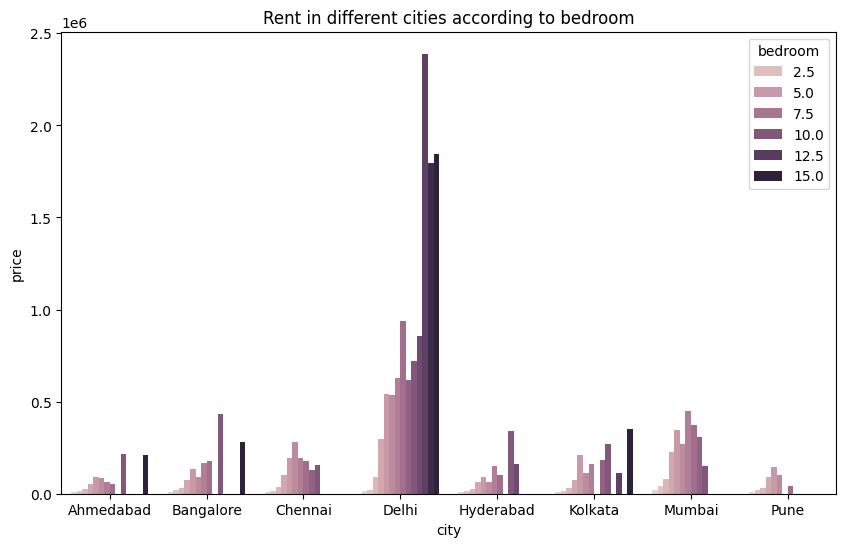

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Rent in different cities according to bedroom")
sns.barplot(x=df['city'], y=df['price'], hue=df['bedroom'],errorbar=None )
plt.ylabel("price")

Text(0, 0.5, 'Rent')

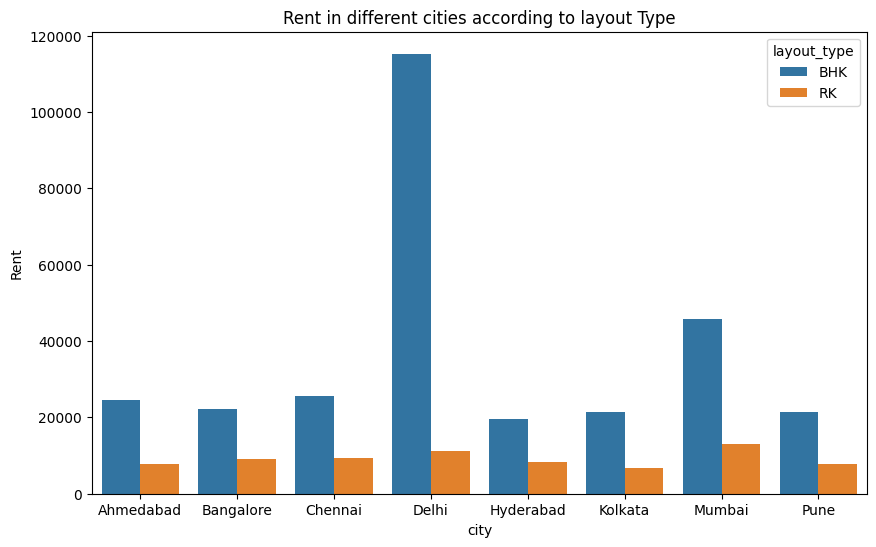

In [ ]:
plt.figure(figsize=(10,6))

plt.title("Rent in different cities according to layout Type")

sns.barplot(x=df['city'], y=df['price'], hue=df['layout_type'], errorbar=None)

# Add label for vertical axis
plt.ylabel("Rent")

Text(0, 0.5, 'Rent')

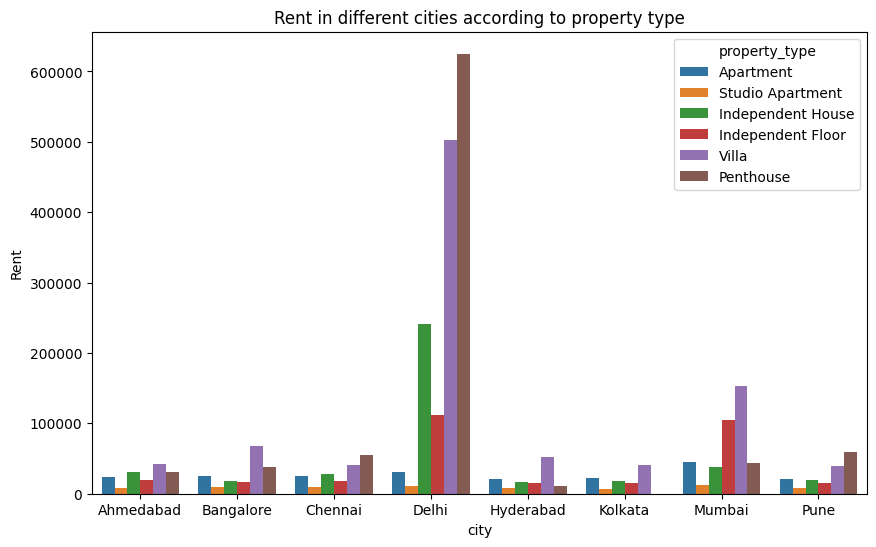

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Rent in different cities according to property type")

sns.barplot(x=df['city'], y=df['price'], hue=df['property_type'], errorbar=None)

plt.ylabel("Rent")

Text(0, 0.5, 'Rent')

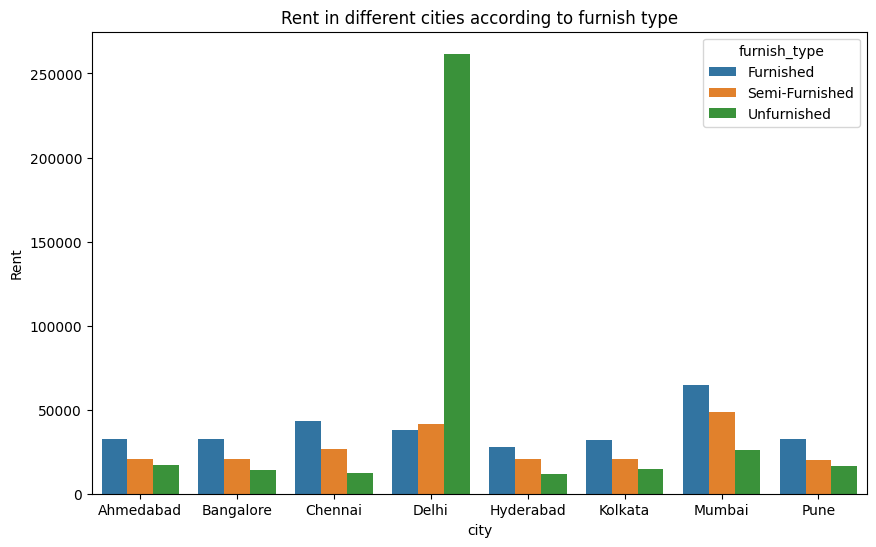

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Rent in different cities according to furnish type")

sns.barplot(x=df['city'], y=df['price'], hue=df['furnish_type'], errorbar=None)

plt.ylabel("Rent")

Text(0, 0.5, 'Rent')

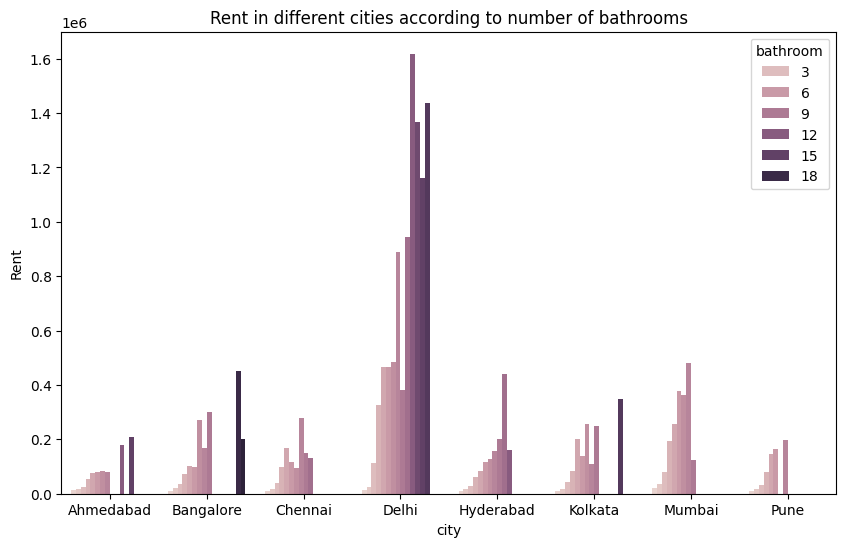

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Rent in different cities according to number of bathrooms")

sns.barplot(x=df['city'], y=df['price'], hue=df['bathroom'], errorbar=None)

plt.ylabel("Rent")

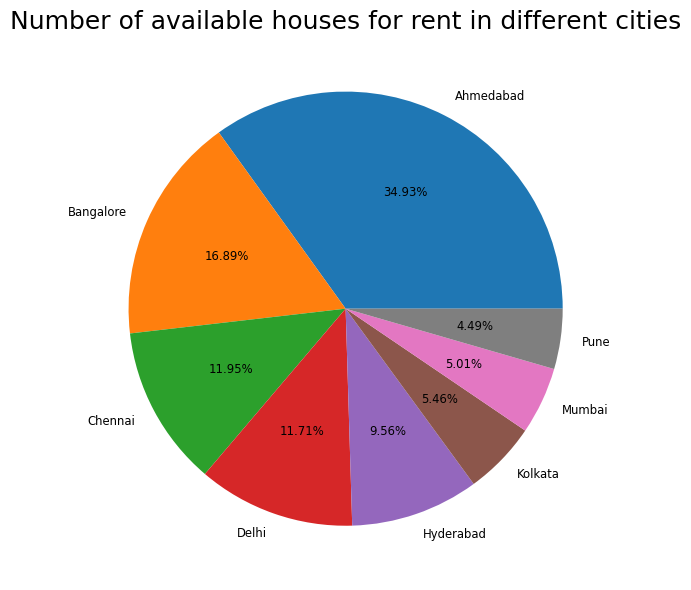

In [ ]:
cities=df['city'].unique()

x=df['city'].value_counts().values

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x, labels = cities, autopct= lambda p:f'{p:.2f}%',
       textprops={'size': 'small'})

ax.set_title('Number of available houses for rent in different cities', fontsize=18)

plt.tight_layout()

In [ ]:
#Remove useless columns
df = df.drop(columns = ['seller_type','locality'])
df.head()

,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,city
0,2.0,BHK,Apartment,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,1.0,RK,Studio Apartment,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,3.0,BHK,Apartment,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,2.0,BHK,Independent House,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,2.0,BHK,Independent House,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [ ]:
#Encoding Categorical Data
rent_data = df.join(pd.get_dummies(df[['property_type','city','furnish_type',
                                 'layout_type']],
                             drop_first=True))
rent_data.drop(columns = ['property_type','city','furnish_type',
                                 'layout_type'],
         inplace = True)
rent_data.dtypes
rent_data.head()

,bedroom,price,area,bathroom,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune,furnish_type_Semi-Furnished,furnish_type_Unfurnished,layout_type_RK
0,2.0,20000.0,1450.0,2.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1.0,7350.0,210.0,1.0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True
2,3.0,22000.0,1900.0,3.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,2.0,13000.0,1285.0,2.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
4,2.0,18000.0,1600.0,2.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
rent_data.dropna()

,bedroom,price,area,bathroom,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune,furnish_type_Semi-Furnished,furnish_type_Unfurnished,layout_type_RK
0,2.0,20000.0,1450.0,2.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1.0,7350.0,210.0,1.0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True
2,3.0,22000.0,1900.0,3.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,2.0,13000.0,1285.0,2.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
4,2.0,18000.0,1600.0,2.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193006,1.0,13250.0,650.0,1.0,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
193007,1.0,7000.0,350.0,1.0,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True
193008,1.0,8500.0,389.0,1.0,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
193009,1.0,16500.0,670.0,2.0,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [ ]:

print(len(rent_data))
rent_data[:12000]

193011


,bedroom,price,area,bathroom,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune,furnish_type_Semi-Furnished,furnish_type_Unfurnished,layout_type_RK
0,2.0,20000.0,1450.0,2.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1.0,7350.0,210.0,1.0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True
2,3.0,22000.0,1900.0,3.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,2.0,13000.0,1285.0,2.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
4,2.0,18000.0,1600.0,2.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,3.0,14500.0,1791.0,3.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
11996,3.0,14700.0,2250.0,3.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
11997,3.0,14700.0,2250.0,3.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
11998,3.0,14700.0,2250.0,3.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(rent_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area','bedroom','bathroom','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
df_train.head()

,bedroom,price,area,bathroom,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune,furnish_type_Semi-Furnished,furnish_type_Unfurnished,layout_type_RK
188967,0.142857,0.003025,0.093969,0.111111,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
26461,0.071429,0.002515,0.064570,0.055556,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
164132,0.000000,0.002345,0.013324,0.000000,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
66542,0.214286,0.055032,0.280936,0.166667,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
177111,0.000000,0.001836,0.030640,0.000000,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [ ]:
df_train.describe()

,bedroom,price,area,bathroom
count,135107.000000,135107.000000,135107.000000,135107.000000
mean,0.077170,0.007338,0.068011,0.058857
std,0.068279,0.015668,0.056284,0.051900
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.002006,0.034901,0.000000
50%,0.071429,0.003365,0.053781,0.055556
75%,0.142857,0.005915,0.077247,0.111111
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_train = df_train.pop('price')
y_test = df_test.pop('price')
X_train = df_train
X_test = df_test

In [ ]:
print(y_train)

188967    0.003025
26461     0.002515
164132    0.002345
66542     0.055032
177111    0.001836
            ...   
82270     0.001496
65615     0.001496
77655     0.054353
56088     0.059281
38408     0.001751
Name: price, Length: 135107, dtype: float64


In [ ]:
print(y_train)

188967    0.003025
26461     0.002515
164132    0.002345
66542     0.055032
177111    0.001836
            ...   
82270     0.001496
65615     0.001496
77655     0.054353
56088     0.059281
38408     0.001751
Name: price, Length: 135107, dtype: float64


Mean Squared Error: 0.16404588781424945


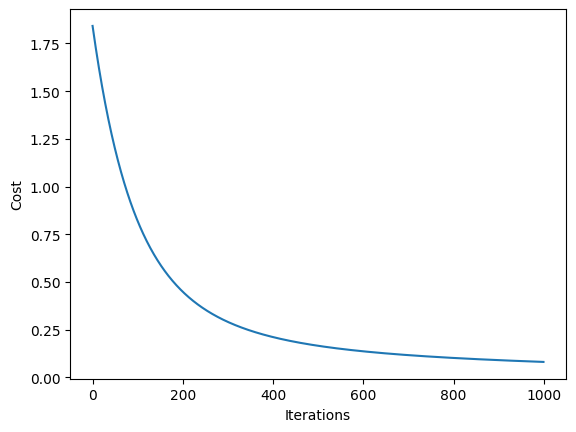

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Initialize the parameters
theta = np.random.randn(X_train.shape[1])

# Define the cost function
def cost_function(X, y, theta):
    m = len(y)
    J = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
    return J

# Define the gradient descent function
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (X.T.dot(X.dot(theta) - y))
        J_history.append(cost_function(X, y, theta))
    return theta, J_history

# Train the model
alpha = 0.01
num_iters = 1000
theta, J_history = gradient_descent(X_train, y_train, theta, alpha, num_iters)

# Make predictions on the testing dataset
y_pred = X_test.dot(theta)
# Evaluate the performance of the model using mean squared error (MSE)
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error:", mse)

# Plot the cost function over iterations
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
regressor = LinearRegression()
# Train the model
regressor.fit(X_train, y_train)
# Make predictions on the testing dataset
y_pred = regressor.predict(X_test)
print(y_pred)
mean_error_reg = mse(y_test,y_pred)
# Calculate the R-squared score
r2_reg = r2_score(y_test, y_pred)
print("R-squared Score:", r2_reg)
print("mean squared error using regresion:",mean_error_reg)

[-0.00371129  0.00992598 -0.00327539 ...  0.00255873  0.00176728
  0.00080403]
R-squared Score: 0.5143963187365064
mean squared error using regresion: 0.00023815027395842473


In [ ]:
from sklearn.utils import resample
# Define the machine learning model
model = LinearRegression()
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_lgr = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample,y_sample)
    y_pred =model.predict(X_test)
    # Evaluate the model on the testing dataset
    score = mse(y_test, y_pred)
    scores_lgr.append(score)

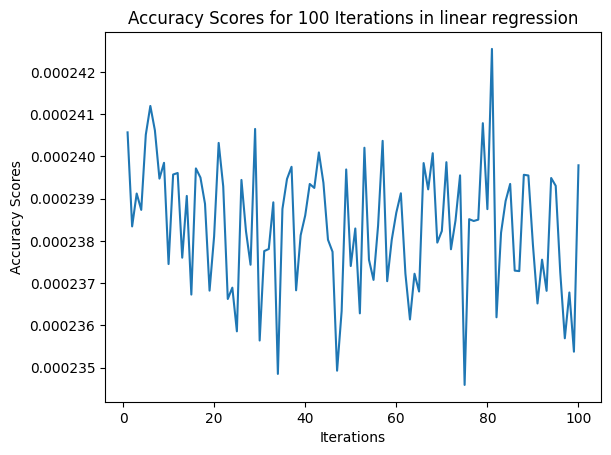

In [ ]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_lgr)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in linear regression")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [ ]:
#SVM INBUIKT FUNCTION
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

# Create an SVM instance and fit the training data
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)
print(y_pred)
mean_error_svm = mse(y_test,y_pred)
print("mean squared error using regresion:",mean_error_svm)
r2_svm = r2_score(y_test, y_pred)
print("R-squared Score:", r2_svm)


[-0.01698318  0.02924579  0.00831996 ...  0.07004901 -0.01697895
  0.00749541]
mean squared error using regresion: 0.0012103780224839336
R-squared Score: -1.4680384098203265


In [ ]:
from sklearn.utils import resample
# Define the machine learning model
model =  SVR()
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_lgr = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample,y_sample)
    y_pred =model.predict(X_test)
    # Evaluate the model on the testing dataset
    score =r2_score(y_test, y_pred)
    scores_lgr.append(score)

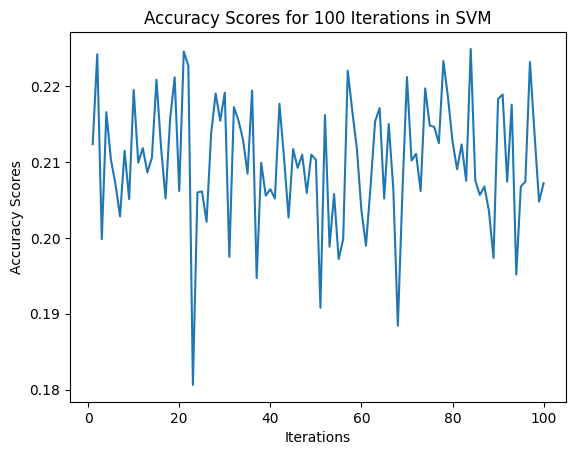

In [ ]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_lgr)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in SVM")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

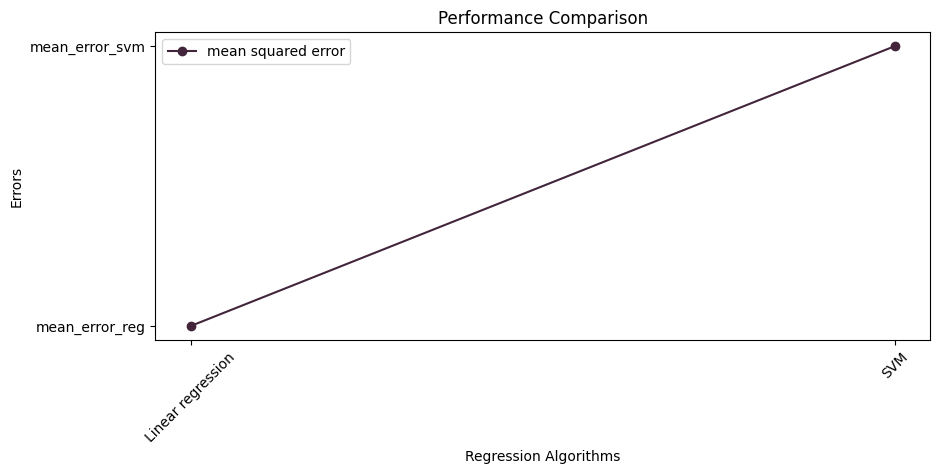

In [ ]:
algorithm_names = ['Linear regression','SVM']
errors = ['mean_error_reg', 'mean_error_svm' ]
# Plotting the scores
plt.figure( figsize = ( 10 , 4 ) )
# Accuracy scores plot
plt.plot(algorithm_names, errors, label = 'mean squared error', marker = 'o', color = '#42253B')
plt.xlabel( 'Regression Algorithms' )
plt.ylabel( 'Errors' )
plt.title( 'Performance Comparison' )
# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks( rotation = 45 )

# Displaying the plot

plt.show ()


In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Split the dataset into training and testing sets
# Create a Ridge model
ridge = Ridge(alpha=1.0)
# Fit the model on the training data
ridge.fit(X_train, y_train)
# Predict the rent on the testing data
y_pred = ridge.predict(X_test)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)



Mean squared error:  0.00023828951165084532


In [ ]:
from sklearn.utils import resample
# Define the machine learning model
model = Ridge()
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_lgr = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample,y_sample)
    y_pred =model.predict(X_test)
    # Evaluate the model on the testing dataset
    score = mean_squared_error(y_test, y_pred)
    scores_lgr.append(score)

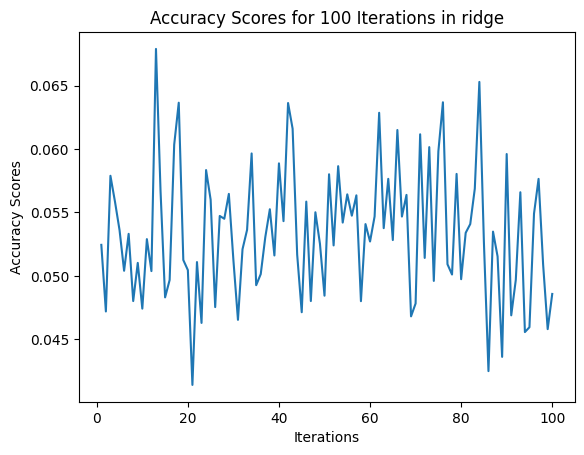

In [ ]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_lgr)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in ridge")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(df.drop('Rent', axis=1), df['Rent'], test_size=0.2, random_state=42)
# Create a Lasso model
lasso = Lasso(alpha=1.0)
# Fit the model on the training data
lasso.fit(X_train, y_train)
# Predict the rent on the testing data
y_pred = lasso.predict(X_test)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)



Mean squared error:  0.0004995318992114443


In [ ]:
from sklearn.utils import resample
# Define the machine learning model
model = Lasso()
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_lgr = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample,y_sample)
    y_pred =model.predict(X_test)
    # Evaluate the model on the testing dataset
    score = mean_squared_error(y_test, y_pred)
    scores_lgr.append(score)

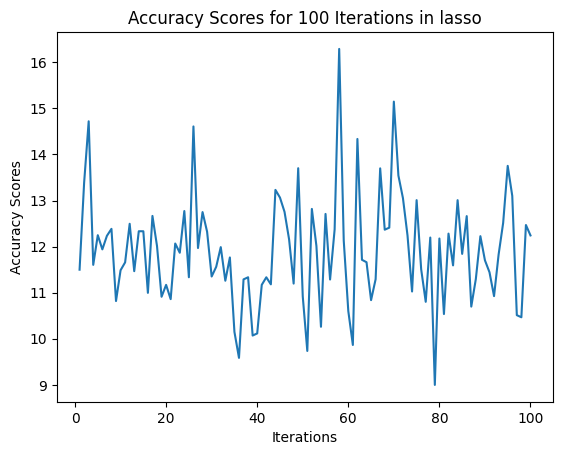

In [ ]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_lgr)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in lasso")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Load the dataset

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(df.drop('Rent', axis=1), df['Rent'], test_size=0.2, random_state=42)
# Create a KNN model
knn = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data
knn.fit(X_train, y_train)
# Predict the rent on the testing data
y_pred = knn.predict(X_test)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)



Mean squared error:  0.00016455862848655404


In [ ]:
from sklearn.utils import resample
# Define the machine learning model
model = KNeighborsRegressor()
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_lgr = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample,y_sample)
    y_pred =model.predict(X_test)
    # Evaluate the model on the testing dataset
    score = mean_squared_error(y_test, y_pred)
    scores_lgr.append(score)

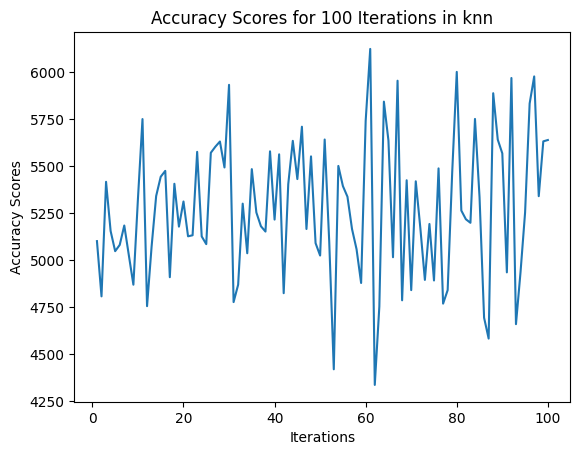

In [ ]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_lgr)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in knn")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()


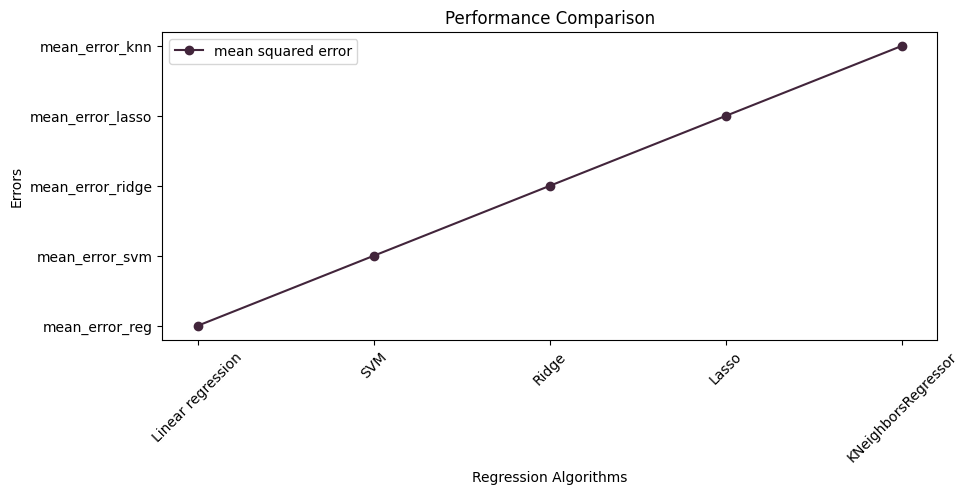

In [ ]:
algorithm_names = ['Linear regression','SVM','Ridge','Lasso','KNeighborsRegressor']
errors = ['mean_error_reg', 'mean_error_svm' ,'mean_error_ridge','mean_error_lasso','mean_error_knn']
# Plotting the scores
plt.figure( figsize = ( 10 , 4 ) )
# Accuracy scores plot
plt.plot(algorithm_names, errors, label = 'mean squared error', marker = 'o', color = '#42253B')
plt.xlabel( 'Regression Algorithms' )
plt.ylabel( 'Errors' )
plt.title( 'Performance Comparison' )
# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks( rotation = 45 )

# Displaying the plot

plt.show ()


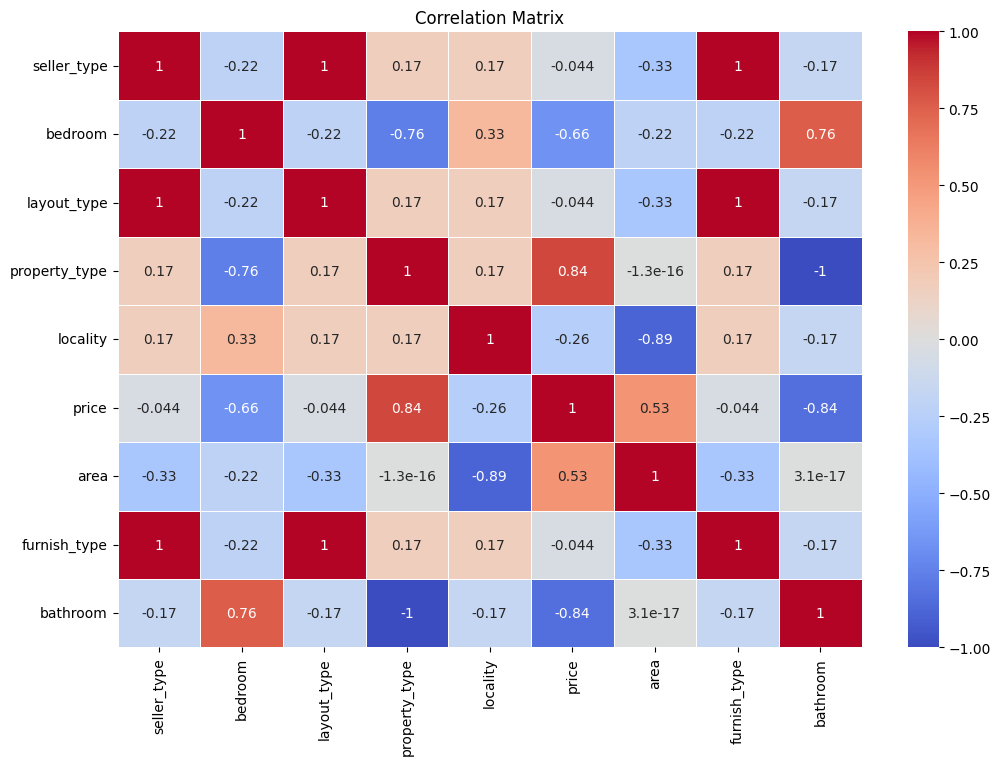

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create a sample dataframe
data = {'seller_type': [1, 0, 1, 1, 0],
        'bedroom': [2, 3, 4, 2, 3],
                'layout_type': [1, 0, 1, 1, 0],
                        'property_type': [1, 1, 0, 1, 0],
                                'locality': [1, 1, 1, 0, 0],
                                        'price': [500000, 700000, 300000, 800000, 400000],
                                                'area': [1000, 1500, 1200, 2000, 1800],
                                                        'furnish_type': [1, 0, 1, 1, 0],
                                                                'bathroom': [2, 2, 3, 2, 3],
                                                                        'city': ['NYC', 'LA', 'Chicago', 'Houston', 'Philly']}

df = pd.DataFrame(data)

                                                                        # drop the 'city' column and calculate the correlation matrix
correlation_matrix = df.drop(columns=['city']).corr()

                                                                        # plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_clf = r2_score(y_test, y_pred)
print("Accuracy:", accuracy_clf)

Accuracy: 0.6120944863601339


In [ ]:
from sklearn.utils import resample
# Define the machine learning model
model = DecisionTreeRegressor()
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_lgr = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
            # Fit the model on the resampled dataset
    model.fit(X_sample,y_sample)
    y_pred =model.predict(X_test)
                        # Evaluate the model on the testing dataset
    score = mean_squared_error(y_test, y_pred)
    scores_lgr.append(score)

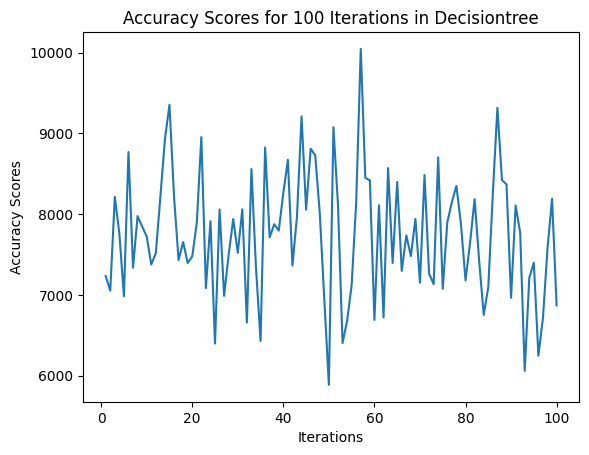

In [ ]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_lgr)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in Decisiontree")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_test and y_pred are the true target values and predicted values, respectively

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)


# Print the regression report
print("Regression Report:")
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("R-squared (R2) Score: {:.2f}".format(r2))

Regression Report:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.01
R-squared (R2) Score: 0.61


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a random regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: {mse}',mse)



Mean Squared Error: {mse} 2794.5569349589814


In [ ]:
from sklearn.utils import resample
# Define the machine learning model
model = RandomForestRegressor()
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_lgr = list()
for i in range(n_iterations):
    # Resample the training dataset
        X_sample, y_sample = resample(X_train, y_train)
                    # Fit the model on the resampled dataset
        model.fit(X_sample,y_sample)
        y_pred =model.predict(X_test)
                                                    # Evaluate the model on the testing dataset
        score = mean_squared_error(y_test, y_pred)
        scores_lgr.append(score)

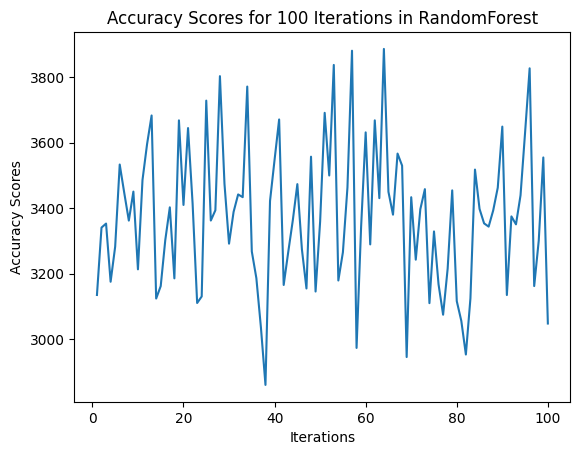

In [ ]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_lgr)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in RandomForest")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a random regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost regressor with 100 trees
adaboost = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the regressor
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 3857.03


In [ ]:
from sklearn.utils import resample
# Define the machine learning model
model = AdaBoostRegressor()
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_lgr = list()
for i in range(n_iterations):
    # Resample the training dataset
     X_sample, y_sample = resample(X_train, y_train)
                                # Fit the model on the resampled dataset
     model.fit(X_sample,y_sample)
     y_pred =model.predict(X_test)
                                                                                                    # Evaluate the model on the testing dataset
     score = mean_squared_error(y_test, y_pred)
     scores_lgr.append(score)

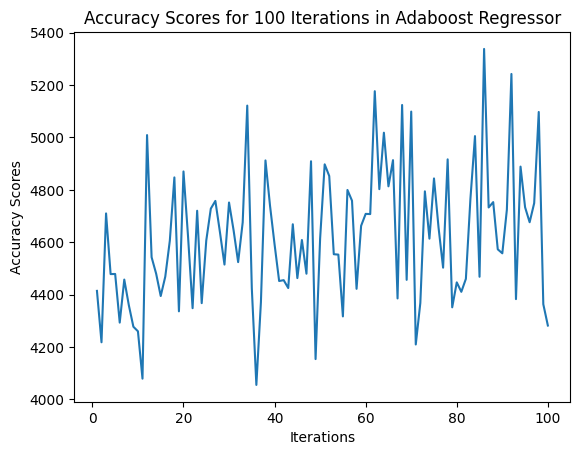

In [ ]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_lgr)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in Adaboost Regressor")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

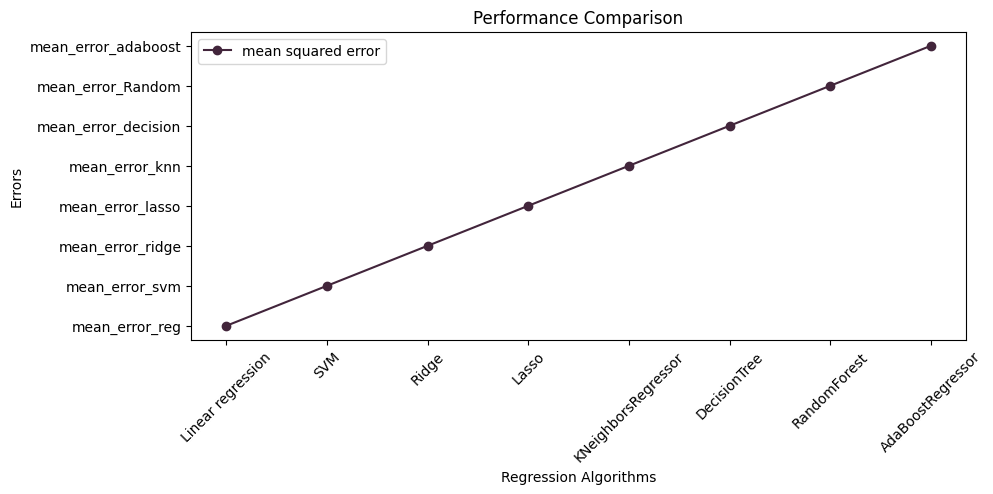

In [ ]:
algorithm_names = ['Linear regression','SVM','Ridge','Lasso','KNeighborsRegressor','DecisionTree','RandomForest','AdaBoostRegressor']
errors = ['mean_error_reg', 'mean_error_svm' ,'mean_error_ridge','mean_error_lasso','mean_error_knn','mean_error_decision','mean_error_Random','mean_error_adaboost']
# Plotting the scores
plt.figure( figsize = ( 10 , 4 ) )
# Accuracy scores plot
plt.plot(algorithm_names, errors, label = 'mean squared error', marker = 'o', color = '#42253B')
plt.xlabel( 'Regression Algorithms' )
plt.ylabel( 'Errors' )
plt.title( 'Performance Comparison' )
# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks( rotation = 45 )

# Displaying the plot

plt.show ()